##### This analysis is done in python primarily using the pandas library, and jupyter notebook as an interactive interpreter.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
pd.options.display.max_rows = 30

df = pd.read_csv("/Users/Hegstrom/Desktop/HCT390_assignment_ACO data file_downloaded.csv", thousands=',', na_values=['-'])
# Getting everything loaded up, and setting up the dataframe.

df['Sav_rate'] = df['Sav_rate']*100 

# Question #5

#### What are some other ACO characteristics that determine ACO savings rate? Choose three variables and look at the association of each with ACO savings and performance. For example, you might look at ACO tenure, patient demographic mix, or patient risk scores.

Text(0.5, 0, 'Years')

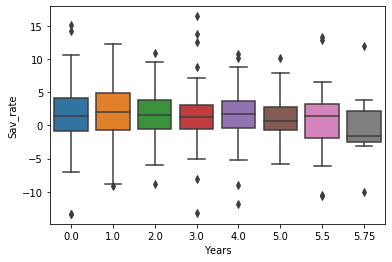

In [2]:
# Let's look at the years of experience the ACO has. Maybe it takes a little while before things kick in.
# Of note, I'm going to ax the one savings rate that's enormous permanently..

df = df[df['Sav_rate'] <30]
ax = sns.boxplot(x=df['Experience'], y=df['Sav_rate'])
plt.xlabel('Years')

Text(0.5, 0, 'Number of Beneficiaries')

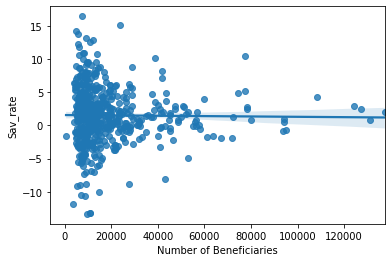

In [3]:
# Let's look at the number of beneficiaries. Perhaps smaller is better?
sns.regplot(data=df, y='Sav_rate', x='N_AB')
plt.xlabel('Number of Beneficiaries')

Hmmm, well there isn't a strong correlation. But, maybe there's something there. The regression drawn shows a very slight downward sloping trend, indicating that less beneficiaries = higher savings. But it's not significant.

Let's look at race.

In [4]:
df[['N_Ben_Race_White', 'N_Ben_Race_Black', 'N_Ben_Race_Asian', 'N_Ben_Race_Hisp', 'N_Ben_Race_Native', 'N_Ben_Race_Other']]

,N_Ben_Race_White,N_Ben_Race_Black,N_Ben_Race_Asian,N_Ben_Race_Hisp,N_Ben_Race_Native,N_Ben_Race_Other
0,26177,1134,402,108,7,1050
1,4850,2770,39,179,10,119
2,4561,4785,93,81,3,260
3,38290,1606,294,342,12,972
4,11623,1950,124,29,9,388
5,5285,986,47,50,8,49
6,20766,82,53,25,66,477
7,5875,407,63,161,7,196
8,7039,998,93,492,21,428
9,20676,967,194,213,641,381


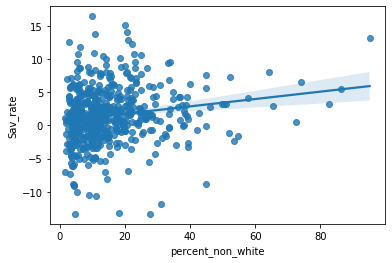

In [5]:
df['percent_white'] = df['N_Ben_Race_White'] / df[['N_Ben_Race_White', 'N_Ben_Race_Black', 'N_Ben_Race_Asian', 'N_Ben_Race_Hisp', 'N_Ben_Race_Native', 'N_Ben_Race_Other']].sum(axis=1)
df['percent_non_white'] = (1 - df['percent_white']) * 100

sns.regplot(data=df, x='percent_non_white', y='Sav_rate')

This shows that more non-white patients under the ACO correlates with a higher savings rate. The scatter plot again shows that the majority of the variation is unexplained, however.